In [2]:
#- What problem are you trying to solve?
#I am looking to build a Predictive wellness index. This project falls within the domain of Regression Machine Learning Problem. The model will attempt to predict future health states based on current data. We will be using a logistic regression model predicting the risk of a future health event (e.g., the risk of cardiovascular disease) based on various wellness indicators
# Which dataset do you plan to use?
# Which exact models do you plan to try? Logistic regression model
#Which exact metrics do you plan to use to evaluate? Accuracy,Precision,Recall (Sensitivity or True Positive Rate), F1 Score, Area Under the Receiver Operating Characteristic Curve (AUC-ROC), Confusion Matrix,Log Loss (Logarithmic Loss)
#How is your approach different than existing approaches, if there are any? The input weighting will be dynamic across different age group, because the impact of the input variables are a function of age and need to be appropriately captured


In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv(r"C:\Users\17063\Downloads\BMI data.csv")

print(df.head())

print(df.tail())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3
     Gender  Height  Weight  Index
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5


In [8]:
# Features and target
X = df[['Gender', 'Height', 'Weight']]
y = df['Index']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Combine standardized data for further processing
processed_data = pd.DataFrame(X_scaled, columns=['Gender', 'Height', 'Weight'])
processed_data['Index'] = y

In [14]:
#Simulate Dynamic Data
# Create time-series weight data for simulation
time_series_data = pd.DataFrame({
    "ID": np.arange(1, len(df) + 1),
    "Weight_t1": df['Weight'],
    "Weight_t2": df['Weight'] * 1.05,
    "Weight_t3": df['Weight'] * 1.10
})

time_series_data['Weight_Change'] = time_series_data['Weight_t3'] - time_series_data['Weight_t1']
time_series_data['Weight_Trend'] = time_series_data['Weight_Change'] / 2

dynamic_data = df.copy()
dynamic_data = dynamic_data.merge(time_series_data, left_index=True, right_index=True)
print(dynamic_data)

     Gender  Height  Weight  Index   ID  Weight_t1  Weight_t2  Weight_t3  \
0         1     174      96      4    1         96     100.80      105.6   
1         1     189      87      2    2         87      91.35       95.7   
2         0     185     110      4    3        110     115.50      121.0   
3         0     195     104      3    4        104     109.20      114.4   
4         1     149      61      3    5         61      64.05       67.1   
..      ...     ...     ...    ...  ...        ...        ...        ...   
495       0     150     153      5  496        153     160.65      168.3   
496       0     184     121      4  497        121     127.05      133.1   
497       0     141     136      5  498        136     142.80      149.6   
498       1     150      95      5  499         95      99.75      104.5   
499       1     173     131      5  500        131     137.55      144.1   

     Weight_Change  Weight_Trend  
0              9.6          4.80  
1              8.

In [15]:
# Prepare Dynamic Features
# Select and standardize features for dynamic modeling
dynamic_features = ['Gender', 'Height', 'Weight_t1', 'Weight_Change', 'Weight_Trend']
scaler_dynamic = StandardScaler()
X_dynamic = dynamic_data[dynamic_features]
X_dynamic_scaled = scaler_dynamic.fit_transform(X_dynamic)
y_dynamic = dynamic_data['Index']

In [19]:
# Train Logistic Regression Model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:

# Evaluate Model
accuracy = accuracy_score(y_test, logistic_model.predict(X_test))
precision = precision_score(y_test, logistic_model.predict(X_test), average='weighted', zero_division=1)
recall = recall_score(y_test, logistic_model.predict(X_test), average='weighted', zero_division=1)
f1 = f1_score(y_test, logistic_model.predict(X_test), average='weighted', zero_division=1)
log_loss_value = log_loss(y_test, logistic_model.predict_proba(X_test))
auc_roc = roc_auc_score(y_test, logistic_model.predict_proba(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, logistic_model.predict(X_test))

In [21]:
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

Evaluation Metrics:
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1 Score: 0.88
Log Loss: 0.53
AUC-ROC: 0.99


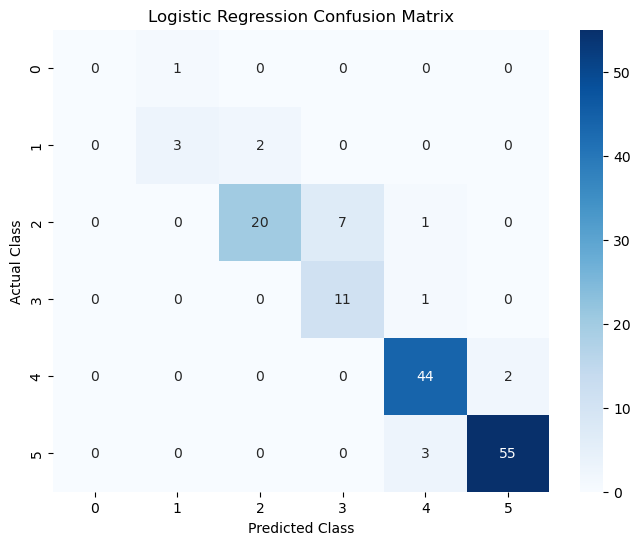

In [22]:
# Visualize Results
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

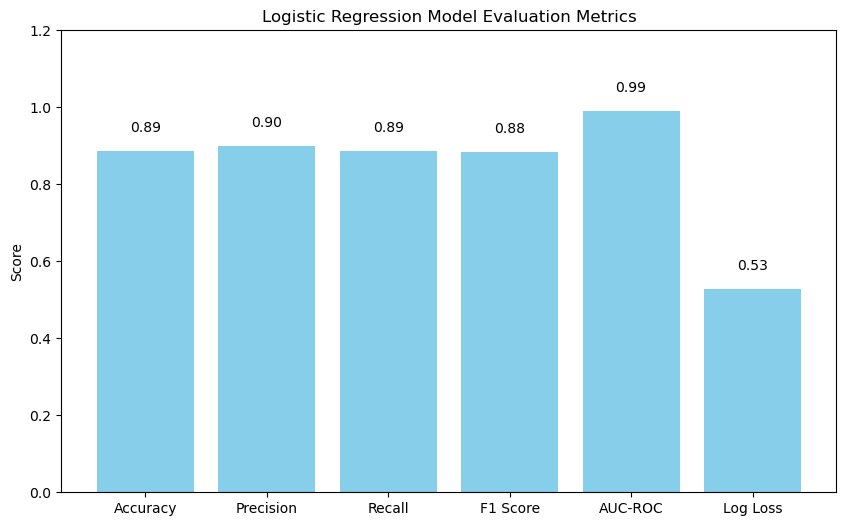

In [23]:
# Bar Chart of Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC", "Log Loss"]
values = [accuracy, precision, recall, f1, auc_roc, log_loss_value]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color="skyblue")
plt.title("Logistic Regression Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.2)
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=10)
plt.show()


In [24]:
# Simulate Weight Changes and Predictions
def simulate_and_predict(df, weight_column, change_percentage):
    simulated_data = df.copy()
    simulated_data['Simulated_Weight'] = simulated_data[weight_column] * (1 + change_percentage)

    # Standardize simulated weights
    simulated_features = simulated_data[['Gender', 'Height']]
    simulated_features['Simulated_Weight'] = simulated_data['Simulated_Weight']
    simulated_scaled = scaler.transform(simulated_features)

    # Predict risks
    simulated_data['Diabetes_Risk'] = logistic_model.predict(simulated_scaled)
    simulated_data['Hypertension_Risk'] = logistic_model.predict(simulated_scaled)

    print(f"Simulated Data for {change_percentage * 100:.0f}% Change:")
    print(simulated_data[['Gender', 'Height', 'Simulated_Weight', 'Diabetes_Risk', 'Hypertension_Risk']].head())

    return simulated_data[['Gender', 'Height', 'Simulated_Weight', 'Diabetes_Risk', 'Hypertension_Risk']]

In [32]:
#Simulate for different 
def simulate_and_predict(df, weight_column, change_percentage):
    simulated_data = df.copy()
    # Calculate simulated weight
    simulated_data[weight_column] = simulated_data[weight_column] * (1 + change_percentage)
    
    # Keep the same feature names as used during training
    features = simulated_data[['Gender', 'Height', 'Weight']]
    
    # Scale the features using the same scaler used during training
    simulated_scaled = scaler.transform(features)
    
    # Predict probabilities for risks
    predicted_probs = logistic_model.predict_proba(simulated_scaled)
    
    # Create result DataFrame with original and simulated data
    result = pd.DataFrame({
        'Gender': simulated_data['Gender'],
        'Height': simulated_data['Height'],
        'Original_Weight': df[weight_column],
        'Simulated_Weight': simulated_data[weight_column],
        'Diabetes_Risk (%)': predicted_probs[:, 1] * 100,
        'Hypertension_Risk (%)': predicted_probs[:, 2] * 100
    })
    
    print(f"\nSimulated Data for {change_percentage * 100:.0f}% Weight Change:")
    print(result.head())
    
    return result

# Simulate for different weight changes
weight_change_percentages = [0.05, 0.10, 0.15, -0.05, -0.10, -0.15]
simulated_results = {}

for change in weight_change_percentages:
    result = simulate_and_predict(df, 'Weight', change)
    simulated_results[f"{int(change * 100)}% Change"] = result

# Combine and Display Results
final_simulated_data = pd.concat(simulated_results, axis=0, names=["Weight_Change_Percentage"])
print("\nFinal Combined Simulated Data:")
print(final_simulated_data.head())


Simulated Data for 5% Weight Change:
   Gender  Height  Original_Weight  Simulated_Weight  Diabetes_Risk (%)  \
0       1     174               96            100.80           0.637125   
1       1     189               87             91.35           9.540855   
2       0     185              110            115.50           0.204982   
3       0     195              104            109.20           1.754258   
4       1     149               61             64.05           3.359214   

   Hypertension_Risk (%)  
0               5.212667  
1              25.685227  
2               3.243224  
3              13.229036  
4              22.107292  

Simulated Data for 10% Weight Change:
   Gender  Height  Original_Weight  Simulated_Weight  Diabetes_Risk (%)  \
0       1     174               96             105.6           0.300094   
1       1     189               87              95.7           6.545043   
2       0     185              110             121.0           0.083965   
3       0 